El objetivo de esta segunda entrega es hacer enfasis en el analisis de los datos crudos y un EDA (Analisis de Datos Exploratorios) sobre la data que se logro extraer de la API de yahoo finance referida a los precios de cierre de las acciones denominadas las 7 Magnificas a lo largo de los ultimos 10 años. Una vez analizados los datos obtenidos y corregidos (de ser necesario) obtendremos algunos Insights y finalmente se procede a subirr los datos a una tabla en la base de datos de Amazon Redshift.

In [1]:
#pip install yfinance

#Importo Bibliotecas Basicas
import pandas as pd
import numpy as np
#importar yfinance (Previa instalacion de la API: pip install yfinance) para tener datos de mercado financiero
import yfinance as yf
#Importar librerias de Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Obtengo los registros de la API

In [2]:
#1.1) Creo una lista en la que incluyo los tickers de las Acciones denominadas 7 Maginifcas
tickers = ['MSFT','GOOG','AAPL','AMZN', 'META', 'TSLA', 'NVDA']

# Descargo el precio de Cierre de las Acciones antes mencionada
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, period="10Y", interval="1d")['Close']

# Creo DataFrame 
df = pd.DataFrame(data
                  )
#Imprimo el DataFrame
print(df)
print(df.columns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  MSFT        GOOG        AAPL        AMZN        META  \
Date                                                                     
2014-05-19   39.750000   26.370600   21.592501   14.838000   59.209999   
2014-05-20   39.680000   26.415976   21.596786   15.059500   58.560001   
2014-05-21   40.349998   26.873220   21.653929   15.250500   60.490002   
2014-05-22   40.099998   27.178383   21.688213   15.245500   60.520000   
2014-05-23   40.119999   27.559336   21.933214   15.612000   61.349998   
...                ...         ...         ...         ...         ...   
2024-05-13  413.720001  170.899994  186.279999  186.570007  468.010010   
2024-05-14  416.559998  171.929993  187.429993  187.070007  471.850006   
2024-05-15  423.079987  173.880005  189.720001  185.990005  481.540009   
2024-05-16  420.989990  175.429993  189.839996  183.630005  473.230011   
2024-05-17  420.209991  177.289993  189.869995  184.699997  471.910004   

                  TSLA        NVDA  


In [3]:
# Mover el índice a la primera columna y reorganizar las columnas
df.reset_index(inplace=True)  # Reiniciar el índice y mover Date a una columna
df = df[['Date', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'TSLA', 'NVDA']]  # Reorganizar las columnas según sea necesario
df['Date'] = pd.to_datetime(df['Date'])  # Convertir la columna Date a tipo datetime

#Imprimo el DataFrame, sus columnas y tipos de datos contenidos en las mismas
print(df)
print(df.columns)
print(df.dtypes)

           Date        MSFT        GOOG        AAPL        AMZN        META  \
0    2014-05-19   39.750000   26.370600   21.592501   14.838000   59.209999   
1    2014-05-20   39.680000   26.415976   21.596786   15.059500   58.560001   
2    2014-05-21   40.349998   26.873220   21.653929   15.250500   60.490002   
3    2014-05-22   40.099998   27.178383   21.688213   15.245500   60.520000   
4    2014-05-23   40.119999   27.559336   21.933214   15.612000   61.349998   
...         ...         ...         ...         ...         ...         ...   
2513 2024-05-13  413.720001  170.899994  186.279999  186.570007  468.010010   
2514 2024-05-14  416.559998  171.929993  187.429993  187.070007  471.850006   
2515 2024-05-15  423.079987  173.880005  189.720001  185.990005  481.540009   
2516 2024-05-16  420.989990  175.429993  189.839996  183.630005  473.230011   
2517 2024-05-17  420.209991  177.289993  189.869995  184.699997  471.910004   

            TSLA        NVDA  
0      13.072667    

# 2) EDA y Data Wrangling

## Analisis a nivel df

In [4]:
#Cantidad de Filas y Columnas del df
df.shape

(2518, 8)

In [5]:
# Informacion sobre el tipo de columna y si existen nulos en las mismas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   MSFT    2518 non-null   float64       
 2   GOOG    2518 non-null   float64       
 3   AAPL    2518 non-null   float64       
 4   AMZN    2518 non-null   float64       
 5   META    2518 non-null   float64       
 6   TSLA    2518 non-null   float64       
 7   NVDA    2518 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 157.5 KB


In [6]:
# Principales valores estadisticos
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2518,2019-05-17 21:14:09.245432832,2014-05-19 00:00:00,2016-11-14 06:00:00,2019-05-18 12:00:00,2021-11-14 06:00:00,2024-05-17 00:00:00,NaN
MSFT,2518.0,163.847951,39.68,60.182499,126.57,254.750004,429.369995,110.480495
GOOG,2518.0,73.701655,24.56007,39.188625,59.203001,106.852377,177.289993,39.609537
AAPL,2518.0,83.969292,21.592501,31.86,52.190001,143.757496,198.110001,58.20944
AMZN,2518.0,90.272161,14.3475,39.067624,89.592999,137.585754,189.5,52.359093
META,2518.0,193.183745,58.560001,121.282501,175.115005,246.822506,527.340027,94.671813
TSLA,2518.0,100.588863,9.578,16.410333,22.906668,203.321667,409.970001,108.713976
NVDA,2518.0,130.12717,4.1975,21.638125,58.245001,168.463127,950.02002,175.917946


In [7]:
#Correlaciones entre variables
df.corr()

,Date,MSFT,GOOG,AAPL,AMZN,META,TSLA,NVDA
Date,1.000000,0.950167,0.923200,0.934427,0.885242,0.783372,0.807378,0.766685
MSFT,0.950167,1.000000,0.978127,0.978112,0.898369,0.857987,0.880770,0.868661
GOOG,0.923200,0.978127,1.000000,0.960358,0.903349,0.861639,0.907594,0.829705
AAPL,0.934427,0.978112,0.960358,1.000000,0.858831,0.771895,0.930655,0.807968
AMZN,0.885242,0.898369,0.903349,0.858831,1.000000,0.885590,0.806644,0.683582
META,0.783372,0.857987,0.861639,0.771895,0.885590,1.000000,0.665066,0.834877
TSLA,0.807378,0.880770,0.907594,0.930655,0.806644,0.665066,1.000000,0.649547
NVDA,0.766685,0.868661,0.829705,0.807968,0.683582,0.834877,0.649547,1.000000


<Axes: >

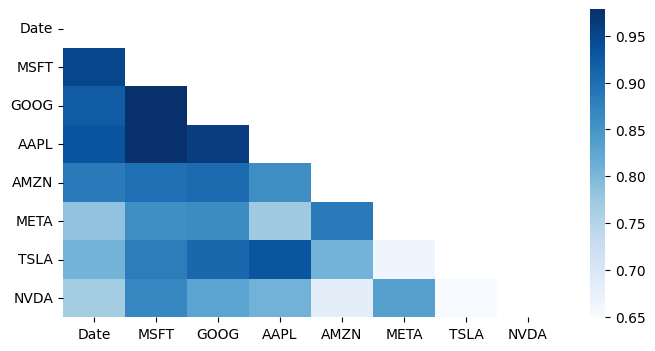

In [8]:
#Correlacion entre variables
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), mask = np.triu(df.corr()), cmap = 'Blues')

<Axes: >

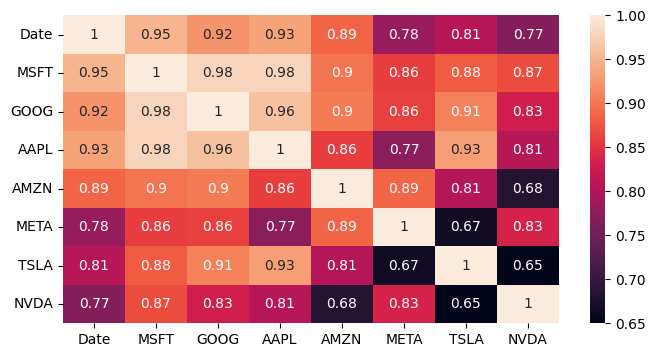

In [9]:
#Opcion 2
f, ax = plt.subplots(figsize = (8,4))
sns.heatmap(df.corr(), annot = True)

## Nulos

In [10]:
#Datos Nulos por columna
df.isnull()

,Date,MSFT,GOOG,AAPL,AMZN,META,TSLA,NVDA
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2513,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False
2515,False,False,False,False,False,False,False,False
2516,False,False,False,False,False,False,False,False


In [11]:
#Suma de Datos Nulos por columna
df.isnull().sum()

Date    0
MSFT    0
GOOG    0
AAPL    0
AMZN    0
META    0
TSLA    0
NVDA    0
dtype: int64

<Axes: >

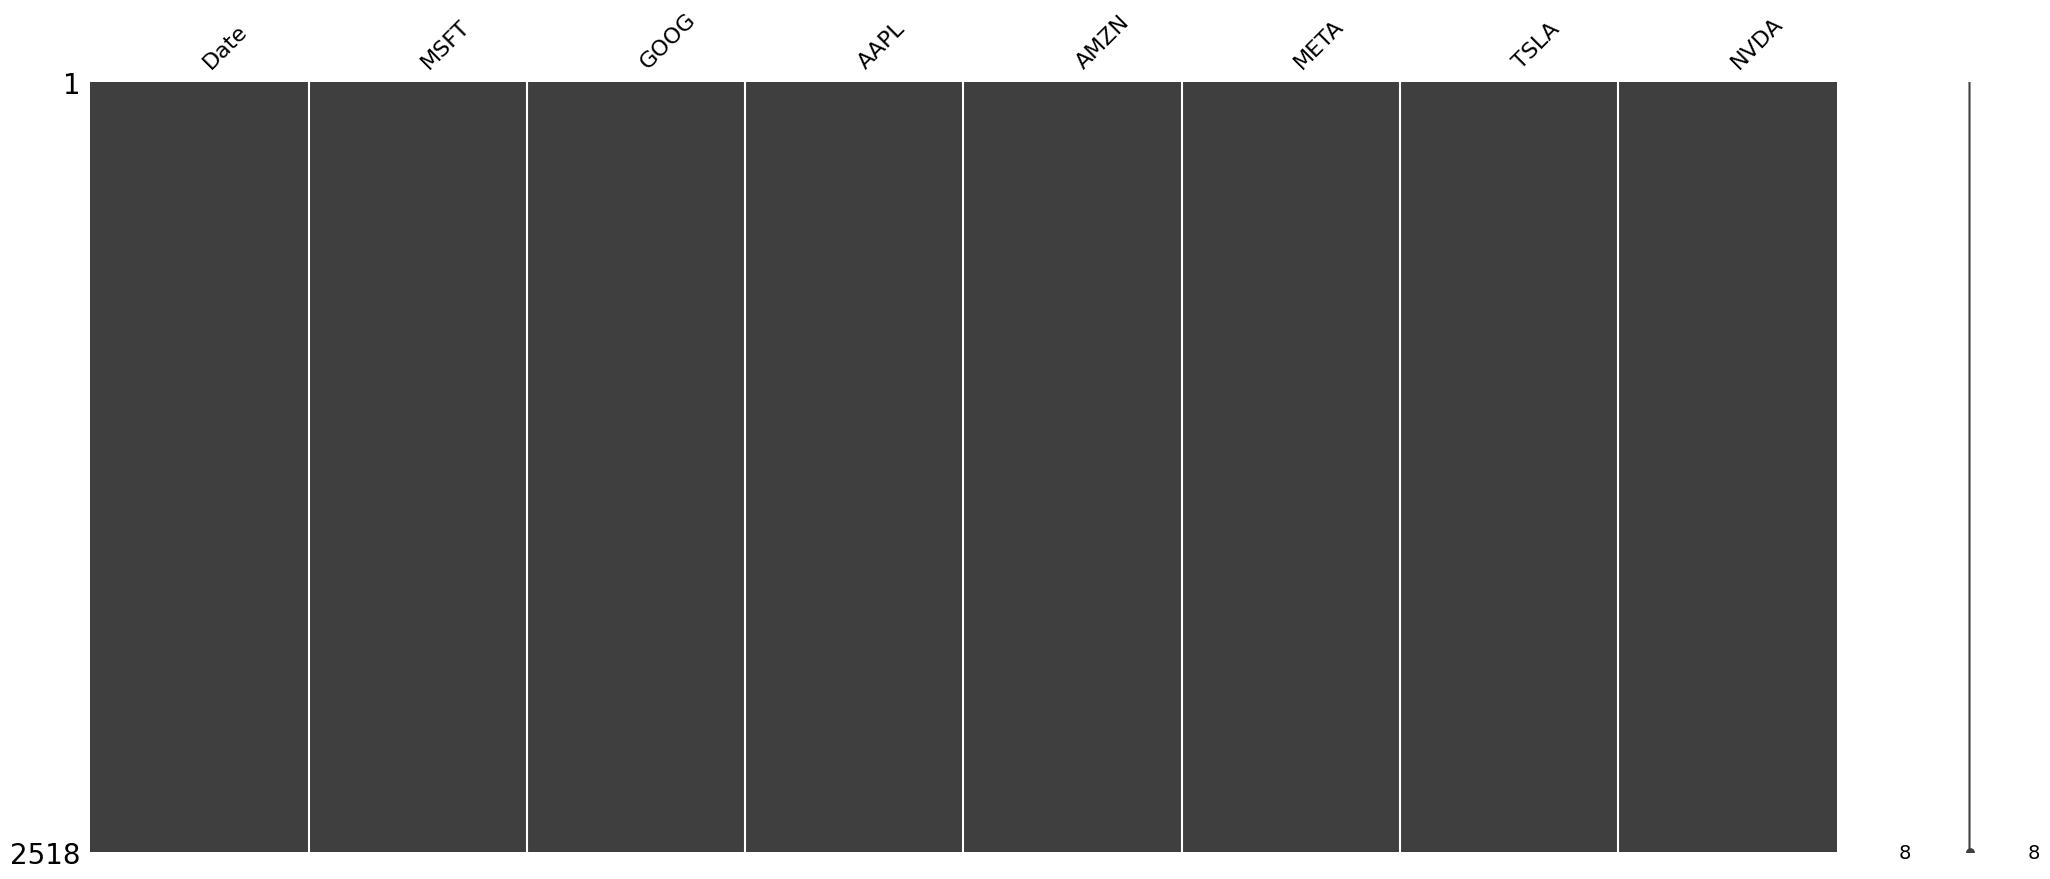

In [12]:
#Analizo Datos Nulos
!pip install missingno

import missingno as msno
#Matrix
msno.matrix(df)

## Duplicados

In [13]:
#Filas Duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2513    False
2514    False
2515    False
2516    False
2517    False
Length: 2518, dtype: bool

In [14]:
#Suma de Filas Duplicadas
df.duplicated().sum()

0

In [15]:
#Expone cuantos valores unicos tiene cada Columna
df.nunique()

Date    2518
MSFT    2326
GOOG    2480
AAPL    2361
AMZN    2478
META    2391
TSLA    2456
NVDA    2381
dtype: int64

## Outliers

<Axes: >

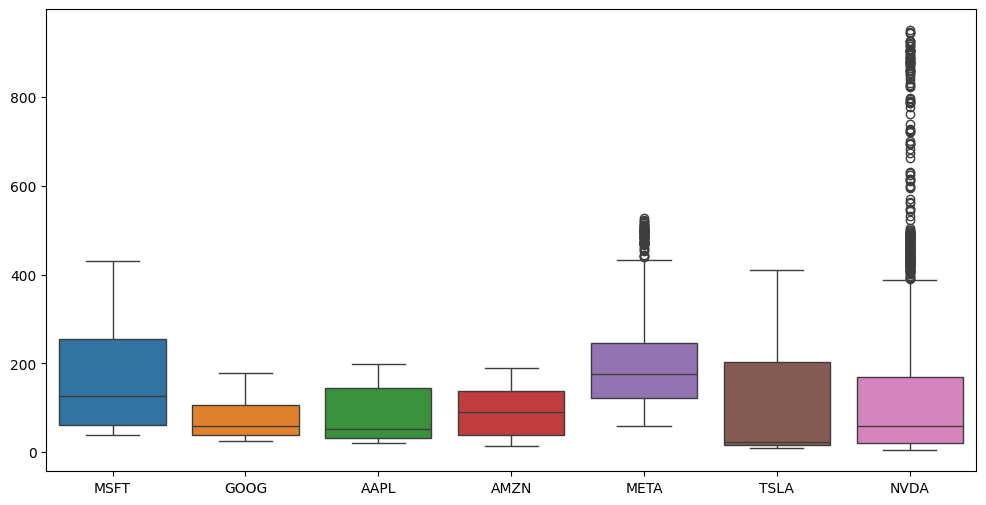

In [16]:
# Con atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

<Axes: >

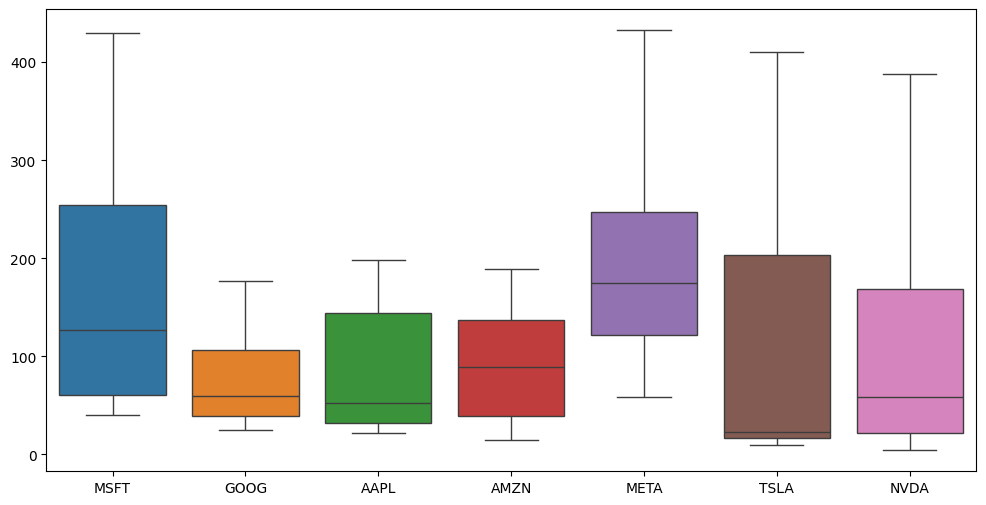

In [17]:
# Sin atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=df, showfliers=False)

In [18]:
#Cargo el DataFrame como CSV
ruta= 'C:/Users/Sofia Medici/Desktop/DATA/Py Notebooks/Entregables/Entregable2_Santiago_Hourcade.csv'
df.to_csv(ruta, index=False)

## Insights

**Correlacion**: La correlacion positiva mas significativa que se observa (0.98) se da entre Microsoft y Apple y entre Microsoft y Google. La correlacion negativa mas significativa que se observa (0.65) se da entre Tesla y Nvidia dos acciones sumanente volatiles
**Nulos**: No se detectaron
**Duplicados**: No se detectaron
**Outliers**: Se observan muchos Outliers en Nvidia lo cual resulta logico por ser una accion sumamente volatil. En menor medida tambien se obsrvan otliers en Meta tambien debido a su volatilidad. Llama la atencion que no se observen outliers en la accion de Tesla, no obstante el grafico de cajas nos expone que su mediana se encuentra muy cercana al primer cuartil lo que muestra la volatilidad en al distribucion de los precios.

# 3) Cargo la tabla a Redshift

In [19]:
#2.1) Creando la conexión a Redsshift
import psycopg2
host="data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com"
data_base="data-engineer-database"
user="cpn_santiago_hourcade_coderhouse"
with open("pwd_redshift.txt",'r') as f:
    pwd= f.read()
try:
    conn = psycopg2.connect(
        host=host,
        dbname=data_base,
        user=user,
        password=pwd,
        port='5439'
    )
    print("Conectado a Redshift con éxito!")
    
except Exception as e:
    print("No es posible conectar a Redshift")
    print(e)


Conectado a Redshift con éxito!


In [20]:
#2.2) Crear la tabla si no existe
with conn.cursor() as cur:
    cur.execute("""
        CREATE TABLE IF NOT EXISTS cpn_santiago_hourcade_coderhouse.siete_magnificas
        (
        Date DATE PRIMARY KEY,
        MSFT VARCHAR(100),
        GOOG VARCHAR(100),
        AAPL VARCHAR(100),
        AMZN VARCHAR(100),
        META VARCHAR(100),
        TSLA VARCHAR(100),
        NVDA VARCHAR(100)     
        )
    """)
    conn.commit()

In [21]:
#2.2.1) Vaciar la tabla para evitar duplicados o inconsistencias
with conn.cursor() as cur:
  cur.execute("Truncate table siete_magnificas")
  count = cur.rowcount


In [22]:
#2.2.2) Consultando que la tabla este vacia
cur = conn.cursor()
cur.execute("SELECT * FROM cpn_santiago_hourcade_coderhouse.siete_magnificas")
results = cur.fetchall()
print(results)


[]


In [23]:
#2.3) Insertando los datos en Redsfhift
from psycopg2.extras import execute_values
with conn.cursor() as cur:
    execute_values(
        cur,
        '''
        INSERT INTO siete_magnificas (Date, MSFT, GOOG, AAPL, AMZN, META, TSLA, NVDA)
        VALUES %s
        ''',
        [tuple(row) for row in df.values],
        page_size=len(df)
    )
    conn.commit()

In [24]:
#2.4) Consultando los registros cargados en la tabla
cur = conn.cursor()
cur.execute("SELECT * FROM cpn_santiago_hourcade_coderhouse.siete_magnificas")
results = cur.fetchall()
print(results)


[(datetime.date(2014, 5, 19), '39.75', '26.3705997467041', '21.592500686645508', '14.838000297546387', '59.209999084472656', '13.072667121887207', '4.635000228881836'), (datetime.date(2014, 5, 20), '39.68000030517578', '26.41597557067871', '21.596786499023438', '15.059499740600586', '58.560001373291016', '13.020000457763672', '4.559999942779541'), (datetime.date(2014, 5, 21), '40.349998474121094', '26.873220443725586', '21.653928756713867', '15.250499725341797', '60.4900016784668', '13.296667098999023', '4.559999942779541'), (datetime.date(2014, 5, 22), '40.099998474121094', '27.178382873535156', '21.688213348388672', '15.245499610900879', '60.52000045776367', '13.658666610717773', '4.579999923706055'), (datetime.date(2014, 5, 23), '40.119998931884766', '27.559335708618164', '21.93321418762207', '15.612000465393066', '61.349998474121094', '13.819999694824219', '4.622499942779541'), (datetime.date(2014, 5, 27), '40.189998626708984', '28.220022201538086', '22.343929290771484', '15.541000

In [25]:
#2.5) Cierro Conexion
conn.close()
cur.close()